In [1]:
import os
import cv2
import yt_dlp
import subprocess
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def motion_detection(frames, threshold = 30, min_pixel_count = 100):
    # Check each frame from movement compared to the previous frame.
    difference_frames = []
    movement = False
    
    for i in range(1, len(frames)):
        gray_frame = cv2.cvtColor(frames[i], cv2.COLOR_BGR2GRAY)
        gray_frame = cv2.GaussianBlur(gray_frame, (5, 5), 0)
        
        previous_gray_frame = cv2.cvtColor(frames[i - 1], cv2.COLOR_BGR2GRAY)
        previous_gray_frame = cv2.GaussianBlur(previous_gray_frame, (5, 5), 0)
        
        difference_frame = cv2.absdiff(gray_frame, previous_gray_frame)
        
        _, difference_threshold = cv2.threshold(difference_frame, threshold, 255, cv2.THRESH_BINARY)
        
        movement_detected = cv2.countNonZero(difference_threshold) > min_pixel_count
        difference_frames.append([movement_detected, difference_threshold])
        
        movement |= movement_detected
        
    return movement, np.array(difference_frames, dtype = "object")

## Saved images

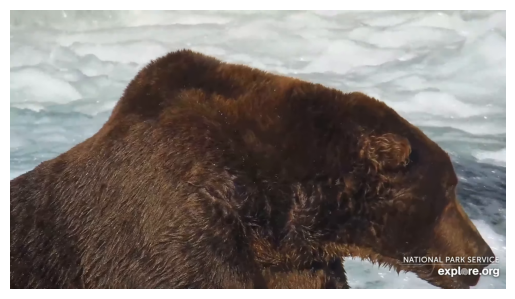

In [3]:
FOLDER_PATH = "../data/1_frame_per_second/high_movement_close_range/"
FRAMES = []


for file_name in os.listdir(FOLDER_PATH):
    if file_name.endswith(".png"):
        img_path = os.path.join(FOLDER_PATH, file_name)
        img = cv2.imread(img_path)
        
        FRAMES.append(img)
        
plt.axis("off")
plt.imshow(cv2.cvtColor(FRAMES[0], cv2.COLOR_BGR2RGB))

Movement detected: True


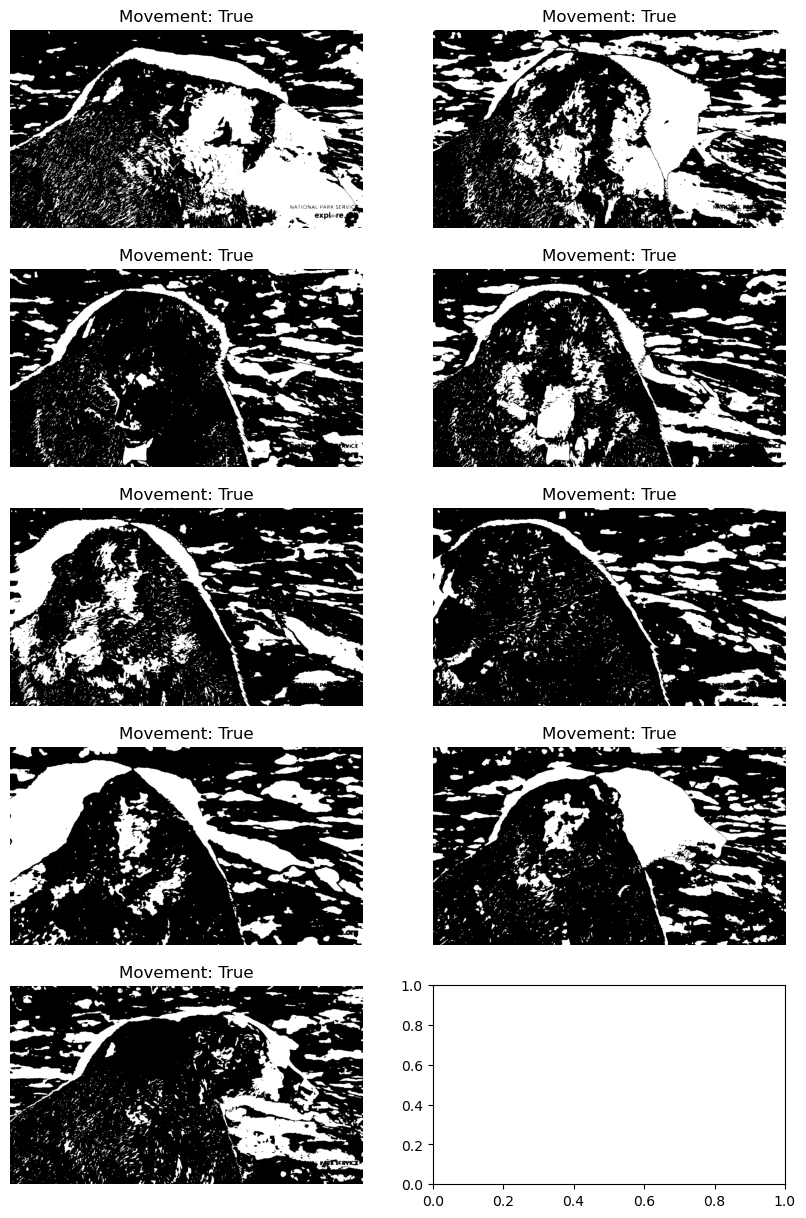

In [4]:
movement, movement_frames = motion_detection(FRAMES, 30, 1000)

print("Movement detected:", movement)

fig, axes = plt.subplots(5, 2, figsize=(10, 15))
for (i, frame) in enumerate(movement_frames[:, 1]):
    axes[i // 2, i % 2].imshow(frame, cmap = "gray")
    axes[i // 2, i % 2].axis("off")
    axes[i // 2, i % 2].set_title(f"Movement: { movement_frames[i][0]}")

## From livestream

In [5]:
urls = ["https://www.youtube.com/watch?v=nzzBwdxfpqo", "https://www.youtube.com/live/HsLvnFQW_yM?si=eltOk2O69icwtRF1"]

ydl_opts = {'format': 'best[ext=mp4]', 'quiet': True,}
ydl = yt_dlp.YoutubeDL(ydl_opts)

url = urls[0]

info_dict = ydl.extract_info(url, download=False)
video_url = info_dict.get("url")

In [6]:
subprocess.run([
    'ffmpeg',
    '-i', video_url,
    '-t', '10',  # Set duration to 10 seconds
    'output.mp4'
])

()

In [7]:
VIDEO_FRAMES = []
cap = cv2.VideoCapture("output.mp4")
fps = cap.get(cv2.CAP_PROP_FPS)
fps_interval = int(fps)

frame_count = 0
success = True
while success:
    success, frame = cap.read()
    
    if not success:
        cap.release()
        break
    
    time_in_secods = frame_count // fps
    
    if frame_count % fps_interval == 0:
        VIDEO_FRAMES.append(frame)
        
    frame_count += 1
    
print("Extracted frames:", len(VIDEO_FRAMES))

Extracted frames: 10


Movement detected: True


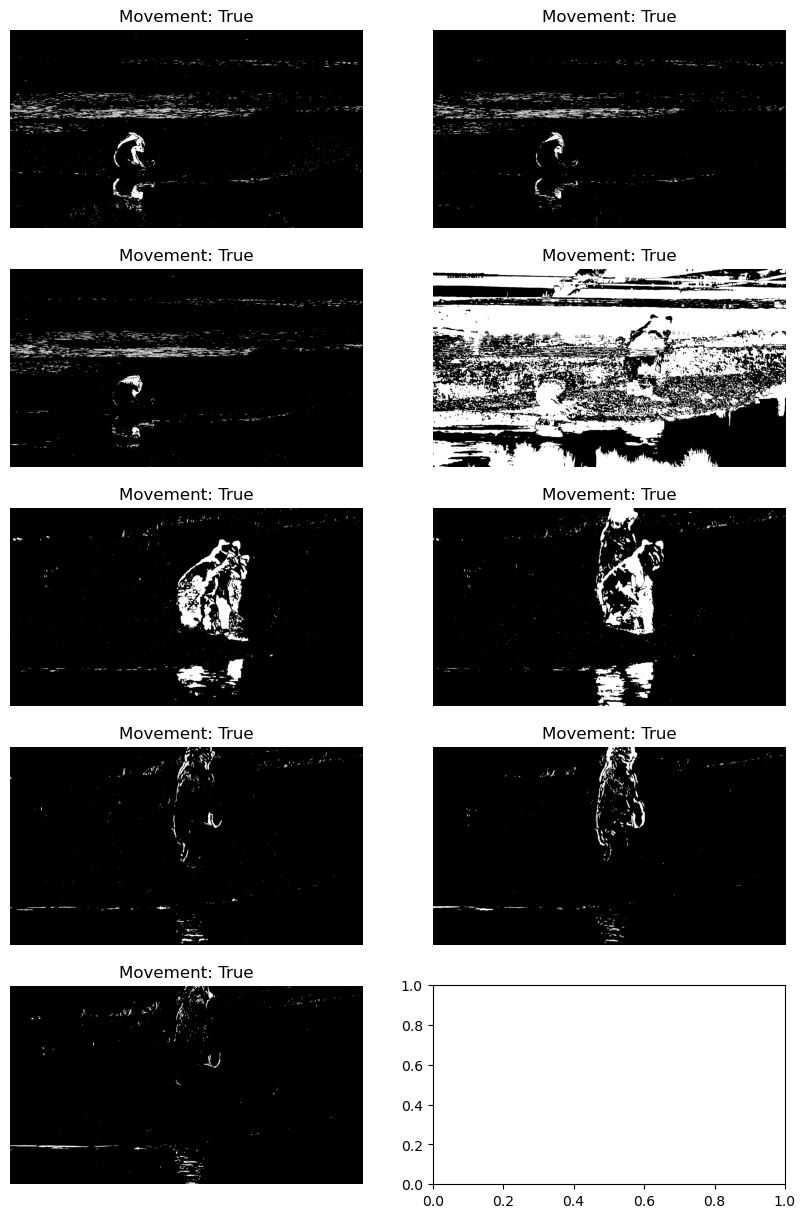

In [8]:
movement, movement_frames = motion_detection(VIDEO_FRAMES, 30, 1000)

print("Movement detected:", movement)

fig, axes = plt.subplots(5, 2, figsize=(10, 15))
for (i, frame) in enumerate(movement_frames[:, 1]):
    axes[i // 2, i % 2].imshow(frame, cmap = "gray")
    axes[i // 2, i % 2].axis("off")
    axes[i // 2, i % 2].set_title(f"Movement: { movement_frames[i][0]}")